# U.S. Dept. of Education College Scorecard
## Notebook for Codementor Machine Learning Class 1

We have been hired as a consultant for a college placement service.  We have been tasked with designing an engine for their college placement tool.  This tool will take some basic information from the student, including budget and SAT scores, and recommend a range of possible schools to start their search.

Download data from Kaggle.  Includes a 1.2GB sqlite database.  Connect to the database, extract data, create a Pandas dataframe for study.

Python has a handy built-in module for sqlite.  See: https://docs.python.org/2/library/sqlite3.html

In [1]:
%matplotlib inline
# allows plotting in cells, we'll use later on.
import pylab
pylab.rcParams['figure.figsize'] = (10, 6) # set a larger figure size

In [2]:
import sqlite3
conn = sqlite3.connect('C:/Users/peter/Documents/Codementor/MLClass/data/college/database.sqlite')


In [3]:
# List the tables in this database!

query = """
SELECT name from sqlite_master WHERE type='table';
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(u'Scorecard',)]


## Pandas (Python Data Analysis Library)
http://pandas.pydata.org/

A pandas dataframe will serve as our starting point for data exploration and predictive modeling.  Pandas includes a large number of interfaces to different data types, including sqlite.  See: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html

The table fields are documented in the pdfs that accompany the data.  It's important to get a basic analysis started quickly.  Let's choose some fields related to our idea (college cost vs. value) and get to work!  We can return later to grab more raw data.

In [4]:
import pandas

In [5]:
query = """
SELECT UNITID,
       INSTNM,
       CONTROL as type,
       COSTT4_A AvgYrCostAcademic,
       COSTT4_P AvgYrCostProgram,
       md_earn_wne_p10 medEarn10yrs,
       md_earn_wne_p6 medEarn6yrs,
       Year,
       UGDS NumStudents,
       SATMTMID Math,
       SATVRMID Verbal,
       SATWRMID Writing,
       STABBR State,
       GRAD_DEBT_MDN DebtAtGrad,
       C150_4 completionRate
       
FROM Scorecard
WHERE Year='{0}'
"""
# I found that 2011 is the latest year with earnings data!
# Plan: use 2013 cost and 2011 earnings.  
df2013 = pandas.read_sql(query.format(2013), conn)
df2011 = pandas.read_sql(query.format(2011), conn)


In [6]:
df2010 = pandas.read_sql(query.format(2010), conn)

In [7]:
df2013

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,100654,Alabama A & M University,Public,18888.0,NaN,None,None,2013,4051.0,400.0,410.0,NaN,AL,33611.5,0.2914
1,100663,University of Alabama at Birmingham,Public,19990.0,NaN,None,None,2013,11200.0,585.0,580.0,NaN,AL,23117,0.5377
2,100690,Amridge University,Private nonprofit,12300.0,NaN,None,None,2013,322.0,NaN,NaN,NaN,AL,26995,0.6667
3,100706,University of Alabama in Huntsville,Public,20306.0,NaN,None,None,2013,5525.0,580.0,575.0,NaN,AL,24738,0.4835
4,100724,Alabama State University,Public,17400.0,NaN,None,None,2013,5354.0,425.0,430.0,NaN,AL,33452,0.2517
5,100751,The University of Alabama,Public,26717.0,NaN,None,None,2013,28692.0,570.0,555.0,540.0,AL,24000,0.6665
6,100760,Central Alabama Community College,Public,12103.0,NaN,None,None,2013,1779.0,NaN,NaN,NaN,AL,PrivacySuppressed,NaN
7,100812,Athens State University,Public,NaN,NaN,None,None,2013,2999.0,NaN,NaN,NaN,AL,18832,NaN
8,100830,Auburn University at Montgomery,Public,16556.0,NaN,None,None,2013,4322.0,NaN,NaN,NaN,AL,21791,0.2705
9,100858,Auburn University,Public,23788.0,NaN,None,None,2013,19761.0,595.0,570.0,565.0,AL,22250,0.6792


## An introduction to Pandas DataFrames

In [8]:
myDataDict =  {
    'temp': [75, 55, 65, 97], 
    'day': ['M', 'Tu', 'Wed', 'Th'], 
    'humidity': [12, 15, 9, 3]
}

mydataframe = pandas.DataFrame(myDataDict)

mydataframe.set_index(['day'], inplace=True)

mydataframe

,humidity,temp
day,,
M,12,75
Tu,15,55
Wed,9,65
Th,3,97


In [9]:
mydataframe.index

Index([u'M', u'Tu', u'Wed', u'Th'], dtype='object', name=u'day')

In [10]:
mydataframe['temp']

day
M      75
Tu     55
Wed    65
Th     97
Name: temp, dtype: int64

In [12]:
mydataframe['temp'] + 100

day
M      175
Tu     155
Wed    165
Th     197
Name: temp, dtype: int64

In [11]:
mydataframe[['humidity', 'temp']]

,humidity,temp
day,,
M,12,75
Tu,15,55
Wed,9,65
Th,3,97


In [13]:
mydataframe.loc['Tu':'Th']

,humidity,temp
day,,
Tu,15,55
Wed,9,65
Th,3,97


In [14]:
mydataframe.iloc[2:4]

,humidity,temp
day,,
Wed,9,65
Th,3,97


In [15]:
mydataframe[['humidity','temp']]

,humidity,temp
day,,
M,12,75
Tu,15,55
Wed,9,65
Th,3,97


In [15]:
mydataframe + 100

,humidity,temp
day,,
M,112,175
Tu,115,155
Wed,109,165
Th,103,197


## And now back to our industrial-strength DataFrame

In [16]:
df2010.index

RangeIndex(start=0, stop=7414, step=1)

In [18]:
df2010.head(3)

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
1,100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
2,100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308


In [19]:
df2010.tail(3)

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
7411,45897302,Strayer University-Katy,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,TX,35500,NaN
7412,45897303,Strayer University-Northwest Houston,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,TX,35500,NaN
7413,45897304,Strayer University-Plano,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,TX,35500,NaN


In [20]:
df2010.loc[7400]

UNITID                                     45891901
INSTNM               Strayer University-Cobb Campus
type                             Private for-profit
AvgYrCostAcademic                               NaN
AvgYrCostProgram                                NaN
medEarn10yrs                                   None
medEarn6yrs                                    None
Year                                           2010
NumStudents                                     NaN
Math                                            NaN
Verbal                                          NaN
Writing                                         NaN
State                                            GA
DebtAtGrad                                    35500
completionRate                                  NaN
Name: 7400, dtype: object

In [21]:
df2010.loc[7400:7410]

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
7400,45891901,Strayer University-Cobb Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7401,45891902,Strayer University-Morrow Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7402,45891903,Strayer University-Roswell Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7403,45891904,Strayer University-Douglasville Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7404,45891905,Strayer University-Lithonia Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7405,45891906,Strayer University-Savannah Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7406,45891907,Strayer University-Augusta Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7407,45891908,Strayer University-Columbus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,GA,35500,NaN
7408,45896401,Strayer University-Columbia Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,SC,35500,NaN
7409,45896402,Strayer University-Charleston Campus,Private for-profit,NaN,NaN,None,None,2010,NaN,NaN,NaN,NaN,SC,35500,NaN


In [24]:
#df2010_withNewIndex = df2010.set_index(['UNITID'])
df2010.set_index(['UNITID'], inplace=True)
# instead of a column name we could have also provided an array
df2010_withNewIndex.index

Int64Index([  100654,   100663,   100690,   100706,   100724,   100751,
              100760,   100812,   100830,   100858,
            ...
            45891905, 45891906, 45891907, 45891908, 45896401, 45896402,
            45897301, 45897302, 45897303, 45897304],
           dtype='int64', name=u'UNITID', length=7414)

In [25]:
df2010.index

Int64Index([  100654,   100663,   100690,   100706,   100724,   100751,
              100760,   100812,   100830,   100858,
            ...
            45891905, 45891906, 45891907, 45891908, 45896401, 45896402,
            45897301, 45897302, 45897303, 45897304],
           dtype='int64', name=u'UNITID', length=7414)

In [ ]:
 df2010.set_index(['UNITID'])
    # you're not doing anything-- the resulting dataframe is not assigned to anything, and we didn't modify in place

In [26]:
df2010.head(3)

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308


In [33]:
df2010_withNewIndex.head(5)

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308
100706,University of Alabama at Huntsville,Public,17064.0,NaN,None,None,2010,5828.0,583.0,570.0,NaN,AL,20678,0.4364
100724,Alabama State University,Public,14390.0,NaN,None,None,2010,4882.0,370.0,400.0,NaN,AL,29433,0.2399


In [99]:
# our indices are specific integers, not in a continuous range.  We could also use strings.

Mini-lesson/Diversion: Basic DataFrame manipulation



In [29]:
# row selection

# method 1: loc (label-based)
x = df2010_withNewIndex.loc[100654]
print(x)
type(x)

INSTNM               Alabama A & M University
type                                   Public
AvgYrCostAcademic                       13762
AvgYrCostProgram                          NaN
medEarn10yrs                             None
medEarn6yrs                              None
Year                                     2010
NumStudents                              4930
Math                                      420
Verbal                                    425
Writing                                   410
State                                      AL
DebtAtGrad                            27070.5
completionRate                         0.3306
Name: 100654, dtype: object


pandas.core.series.Series

In [31]:
df2010.loc[ [100654, 100663, 100690] ]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308


In [32]:
# row selection method 2: using a Boolean array
df2010_withNewIndex.loc[ [True, False, True, True, False] ]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308
100706,University of Alabama at Huntsville,Public,17064.0,NaN,None,None,2010,5828.0,583.0,570.0,NaN,AL,20678,0.4364


In [33]:
df2010.AvgYrCostAcademic
df2010['AvgYrCostAcademic'] # same thing

UNITID
100654      13762.0
100663      18003.0
100690      20700.0
100706      17064.0
100724      14390.0
100751      21565.0
100760       7109.0
100812          NaN
100830      14367.0
100858      19490.0
100937      38205.0
101028       5540.0
101073      13210.0
101116      27418.0
101143       9146.0
101161       7987.0
101189      24105.0
101240       9628.0
101286       7168.0
101295       9743.0
101301      14339.0
101365      21272.0
101435      28724.0
101453      14639.0
101462      10428.0
101480      16378.0
101499       7359.0
101505      12048.0
101514       8937.0
101541      24537.0
             ...   
45057102        NaN
45312701        NaN
45312702        NaN
45316301        NaN
45316302        NaN
45316303        NaN
45316304        NaN
45316305        NaN
45316306        NaN
45321501        NaN
45321502        NaN
45321503        NaN
45666701        NaN
45666702        NaN
45666703        NaN
45786401        NaN
45891901        NaN
45891902        NaN
45891903     

In [34]:
# lets make a useful Boolean array
hicost = df2010.AvgYrCostAcademic > 50000


hicost

UNITID
100654      False
100663      False
100690      False
100706      False
100724      False
100751      False
100760      False
100812      False
100830      False
100858      False
100937      False
101028      False
101073      False
101116      False
101143      False
101161      False
101189      False
101240      False
101286      False
101295      False
101301      False
101365      False
101435      False
101453      False
101462      False
101480      False
101499      False
101505      False
101514      False
101541      False
            ...  
45057102    False
45312701    False
45312702    False
45316301    False
45316302    False
45316303    False
45316304    False
45316305    False
45316306    False
45321501    False
45321502    False
45321503    False
45666701    False
45666702    False
45666703    False
45786401    False
45891901    False
45891902    False
45891903    False
45891904    False
45891905    False
45891906    False
45891907    False
45891908    False
458

In [35]:
type(hicost)

pandas.core.series.Series

In [36]:
hicost.describe()

count      7414
unique        2
top       False
freq       7299
Name: AvgYrCostAcademic, dtype: object

In [37]:
# use the boolean array to select rows.  the ':' means all columns; we could also pass a column list
df2010.loc[hicost]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
109651,Art Center College of Design,Private nonprofit,52990.0,NaN,None,None,2010,1540.0,NaN,NaN,NaN,CA,33867,0.7143
111081,California Institute of the Arts,Private nonprofit,51823.0,NaN,None,None,2010,895.0,NaN,NaN,NaN,CA,25000,0.6497
111948,Chapman University,Private nonprofit,51766.0,NaN,None,None,2010,4879.0,605.0,590.0,605.0,CA,19625,0.7022
112260,Claremont McKenna College,Private nonprofit,52934.0,NaN,None,None,2010,1253.0,700.0,690.0,NaN,CA,8103.5,0.9319
113698,Dominican University of California,Private nonprofit,50250.0,NaN,None,None,2010,1561.0,510.0,510.0,517.0,CA,22986,0.5507
115409,Harvey Mudd College,Private nonprofit,52737.0,NaN,None,None,2010,771.0,770.0,715.0,715.0,CA,20125,0.8698
117946,Loyola Marymount University,Private nonprofit,52071.0,NaN,None,None,2010,5796.0,610.0,595.0,610.0,CA,17925,0.7971
118888,Mills College,Private nonprofit,51027.0,NaN,None,None,2010,957.0,545.0,585.0,565.0,CA,22125,0.6148
120254,Occidental College,Private nonprofit,52973.0,NaN,None,None,2010,2073.0,645.0,645.0,645.0,CA,14895,0.8468


In [38]:
df2010.loc[df2010.AvgYrCostAcademic > 50000]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
109651,Art Center College of Design,Private nonprofit,52990.0,NaN,None,None,2010,1540.0,NaN,NaN,NaN,CA,33867,0.7143
111081,California Institute of the Arts,Private nonprofit,51823.0,NaN,None,None,2010,895.0,NaN,NaN,NaN,CA,25000,0.6497
111948,Chapman University,Private nonprofit,51766.0,NaN,None,None,2010,4879.0,605.0,590.0,605.0,CA,19625,0.7022
112260,Claremont McKenna College,Private nonprofit,52934.0,NaN,None,None,2010,1253.0,700.0,690.0,NaN,CA,8103.5,0.9319
113698,Dominican University of California,Private nonprofit,50250.0,NaN,None,None,2010,1561.0,510.0,510.0,517.0,CA,22986,0.5507
115409,Harvey Mudd College,Private nonprofit,52737.0,NaN,None,None,2010,771.0,770.0,715.0,715.0,CA,20125,0.8698
117946,Loyola Marymount University,Private nonprofit,52071.0,NaN,None,None,2010,5796.0,610.0,595.0,610.0,CA,17925,0.7971
118888,Mills College,Private nonprofit,51027.0,NaN,None,None,2010,957.0,545.0,585.0,565.0,CA,22125,0.6148
120254,Occidental College,Private nonprofit,52973.0,NaN,None,None,2010,2073.0,645.0,645.0,645.0,CA,14895,0.8468


In [39]:
# row selection method 3: integer/row number
df2010_withNewIndex.iloc[1]

INSTNM               University of Alabama at Birmingham
type                                              Public
AvgYrCostAcademic                                  18003
AvgYrCostProgram                                     NaN
medEarn10yrs                                        None
medEarn6yrs                                         None
Year                                                2010
NumStudents                                        10661
Math                                                 600
Verbal                                               585
Writing                                              NaN
State                                                 AL
DebtAtGrad                                         19691
completionRate                                    0.4108
Name: 100663, dtype: object

In [40]:
df2010.iloc[0:3]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308


In [42]:
x = df2010_withNewIndex.iloc[0:3]

In [43]:
type(x)

pandas.core.frame.DataFrame

In [44]:
x[['INSTNM', 'Math', 'Verbal']]

,INSTNM,Math,Verbal
UNITID,,,
100654,Alabama A & M University,420.0,425.0
100663,University of Alabama at Birmingham,600.0,585.0
100690,Amridge University,NaN,NaN


In [45]:
df2010.iloc[0:10][['INSTNM', 'Math', 'Verbal']]

,INSTNM,Math,Verbal
UNITID,,,
100654,Alabama A & M University,420.0,425.0
100663,University of Alabama at Birmingham,600.0,585.0
100690,Amridge University,NaN,NaN
100706,University of Alabama at Huntsville,583.0,570.0
100724,Alabama State University,370.0,400.0
100751,The University of Alabama,560.0,555.0
100760,Central Alabama Community College,NaN,NaN
100812,Athens State University,NaN,NaN
100830,Auburn University at Montgomery,NaN,NaN


In [46]:
df2010.iloc[42:47, 2:5]  # rows 42-46, cols 2-4

,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs
UNITID,,,
101958,23965.0,NaN,None
101994,6663.0,NaN,None
102030,7317.0,NaN,None
102049,32527.0,NaN,None
102058,6147.0,NaN,None


In [182]:
# method 4: .ix
# a single label; a single integer;
# a list of labels; a list of integers;
# a slice of integers; a slice of labels;
# a Boolean array

# once you get good at using it, you can probably avoid
# switching between .loc and iloc

df2010_withNewIndex.ix[100654]

INSTNM               Alabama A & M University
type                                   Public
AvgYrCostAcademic                       13762
AvgYrCostProgram                          NaN
medEarn10yrs                             None
medEarn6yrs                              None
Year                                     2010
NumStudents                              4930
Math                                      420
Verbal                                    425
Writing                                   410
State                                      AL
DebtAtGrad                            27070.5
completionRate                         0.3306
Name: 100654, dtype: object

In [183]:
df2010_withNewIndex.ix[1]  # error; .loc (label-based) operator takes precedence

KeyError: 1L

In [47]:
# following are equivalent ways to select a column
x = df2010.AvgYrCostAcademic
x = df2010['AvgYrCostAcademic']  # your only choice if there are spaces
#x = df2010[[3]]
type(x)


pandas.core.series.Series

Pandas series documentation here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

It's a numpy array together with an index


In [48]:
x.head()

UNITID
100654    13762.0
100663    18003.0
100690    20700.0
100706    17064.0
100724    14390.0
Name: AvgYrCostAcademic, dtype: float64

In [50]:
x[0:3]

UNITID
100654    13762.0
100663    18003.0
100690    20700.0
Name: AvgYrCostAcademic, dtype: float64

In [51]:
x.iloc[2:5]

UNITID
100690    20700.0
100706    17064.0
100724    14390.0
Name: AvgYrCostAcademic, dtype: float64

In [52]:
x.loc[100654]

13762.0

In [68]:
x[100654]

13762.0

In [53]:
# columns have methods which can produce, for example, other columns
y = x.describe()
y

C:\Users\peter\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     4055.000000
mean     22286.462392
std      11126.865080
min       3368.000000
25%               NaN
50%               NaN
75%               NaN
max      58650.000000
Name: AvgYrCostAcademic, dtype: float64

In [54]:
type(y)

pandas.core.series.Series

In [55]:
y.index

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

In [56]:
y.values

array([  4055.        ,  22286.46239211,  11126.86508007,   3368.        ,
                   nan,             nan,             nan,  58650.        ])

In [57]:
y['max']

58650.0

In [58]:
# selecting multiple columns makes a dataframe
z = df2010[['Math', 'Verbal', 'State']]
type(z)


pandas.core.frame.DataFrame

In [59]:
z.head()

,Math,Verbal,State
UNITID,,,
100654,420.0,425.0,AL
100663,600.0,585.0,AL
100690,NaN,NaN,AL
100706,583.0,570.0,AL
100724,370.0,400.0,AL


In [58]:
# slicing a series
# format is start : end : by
x[0:5]

UNITID
100654    13762.0
100663    18003.0
100690    20700.0
100706    17064.0
100724    14390.0
Name: AvgYrCostAcademic, dtype: float64

In [59]:
type(x[0:5])

pandas.core.series.Series

End of mini-lesson

In [60]:
df2010.describe()

,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate
count,4055.000000,2423.000000,7414.0,6864.000000,1289.000000,1273.000000,732.000000,2319.000000
mean,22286.462392,24213.170863,2010.0,2507.803176,532.643134,526.416339,524.505464,0.478494
std,11126.865080,9926.673725,0.0,5861.955944,69.352965,66.175245,75.447076,0.215095
min,3368.000000,0.000000,2010.0,0.000000,345.000000,360.000000,355.000000,0.000000
25%,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN
max,58650.000000,96720.000000,2010.0,253594.000000,785.000000,750.000000,755.000000,1.000000


In [61]:
df2010.columns

Index([u'INSTNM', u'type', u'AvgYrCostAcademic', u'AvgYrCostProgram',
       u'medEarn10yrs', u'medEarn6yrs', u'Year', u'NumStudents', u'Math',
       u'Verbal', u'Writing', u'State', u'DebtAtGrad', u'completionRate'],
      dtype='object')

In [62]:
df2013

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,100654,Alabama A & M University,Public,18888.0,NaN,None,None,2013,4051.0,400.0,410.0,NaN,AL,33611.5,0.2914
1,100663,University of Alabama at Birmingham,Public,19990.0,NaN,None,None,2013,11200.0,585.0,580.0,NaN,AL,23117,0.5377
2,100690,Amridge University,Private nonprofit,12300.0,NaN,None,None,2013,322.0,NaN,NaN,NaN,AL,26995,0.6667
3,100706,University of Alabama in Huntsville,Public,20306.0,NaN,None,None,2013,5525.0,580.0,575.0,NaN,AL,24738,0.4835
4,100724,Alabama State University,Public,17400.0,NaN,None,None,2013,5354.0,425.0,430.0,NaN,AL,33452,0.2517
5,100751,The University of Alabama,Public,26717.0,NaN,None,None,2013,28692.0,570.0,555.0,540.0,AL,24000,0.6665
6,100760,Central Alabama Community College,Public,12103.0,NaN,None,None,2013,1779.0,NaN,NaN,NaN,AL,PrivacySuppressed,NaN
7,100812,Athens State University,Public,NaN,NaN,None,None,2013,2999.0,NaN,NaN,NaN,AL,18832,NaN
8,100830,Auburn University at Montgomery,Public,16556.0,NaN,None,None,2013,4322.0,NaN,NaN,NaN,AL,21791,0.2705
9,100858,Auburn University,Public,23788.0,NaN,None,None,2013,19761.0,595.0,570.0,565.0,AL,22250,0.6792


In [63]:
df2011.describe()

,UNITID,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate
count,7.675000e+03,4155.000000,2536.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000
mean,1.331383e+06,23183.825993,17583.397476,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112
std,5.868773e+06,11432.356729,6304.445260,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701
min,1.006540e+05,2200.000000,2134.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000
25%,1.712295e+05,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
50%,2.246420e+05,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
75%,4.416010e+05,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
max,4.616340e+07,73450.000000,76545.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000


In [75]:
df2011.head(3)

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,100654,Alabama A & M University,Public,14965.0,NaN,31400,22800,2011,4112.0,405.0,410.0,405.0,AL,29573,0.3171
1,100663,University of Alabama at Birmingham,Public,19547.0,NaN,40300,33200,2011,10854.0,570.0,565.0,NaN,AL,20700,0.4462
2,100690,Amridge University,Private nonprofit,11540.0,NaN,38100,32800,2011,360.0,NaN,NaN,NaN,AL,22370,0.2500


In [64]:
df2011.medEarn10yrs.describe()

count                  6738
unique                  597
top       PrivacySuppressed
freq                    855
Name: medEarn10yrs, dtype: object

In [65]:
pandas.to_numeric?

In [66]:
df2011['earn10'] = pandas.to_numeric(df2011['medEarn10yrs'], errors='coerce')
df2011['sat'] = df2011['Math'] + df2011['Verbal']

In [67]:
df2011.describe()

,UNITID,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate,earn10,sat
count,7.675000e+03,4155.000000,2536.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000,5883.000000,1267.000000
mean,1.331383e+06,23183.825993,17583.397476,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112,33137.769845,1056.249408
std,5.868773e+06,11432.356729,6304.445260,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701,14016.378720,137.196395
min,1.006540e+05,2200.000000,2134.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000,8400.000000,675.000000
25%,1.712295e+05,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.246420e+05,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.416010e+05,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.616340e+07,73450.000000,76545.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000,250000.000000,1525.000000


Data pre-processing is a critical step.  Most machine learning algorithms, and really any type of quantitative analysis, requires data of sufficient quality in specific formats.

http://scikit-learn.org/stable/modules/preprocessing.html

That page is a great reference; think of it as a "Swiss-Army knife" for pre-processing.  Parts of it come in handy, but usually not everything for the same project.

Now for a first look at normalization (scale individual samples to have unit norm- important when we have similarity metrics), scaling (standardization by centering at the average and dividing by the SD, or, min-max scaling) and clustering (assigning labels to groups of similar samples).

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

http://scikit-learn.org/stable/modules/clustering.html

In [68]:
col_list = ['sat', 'AvgYrCostAcademic', 'earn10', 'completionRate']
dfc = df2011[col_list].dropna()

In [70]:
dfc.describe()


,sat,AvgYrCostAcademic,earn10,completionRate
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,1057.826667,30803.961667,43336.750000,0.550160
std,136.508206,12113.771300,10329.312014,0.177358
min,675.000000,2200.000000,17600.000000,0.053800
25%,965.000000,19742.250000,36600.000000,0.422125
50%,1035.000000,30326.000000,41700.000000,0.542450
75%,1126.000000,39742.250000,47500.000000,0.666975
max,1525.000000,57590.000000,116400.000000,0.974300


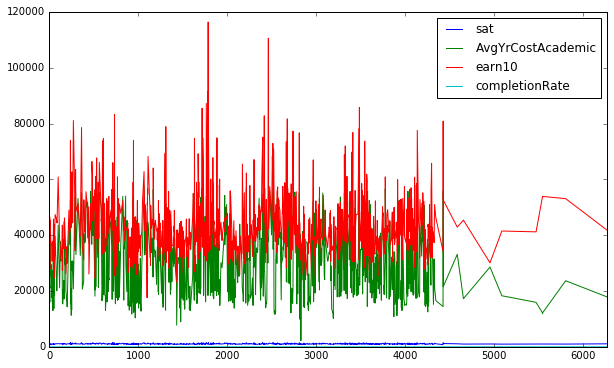

In [71]:
dfc.plot()

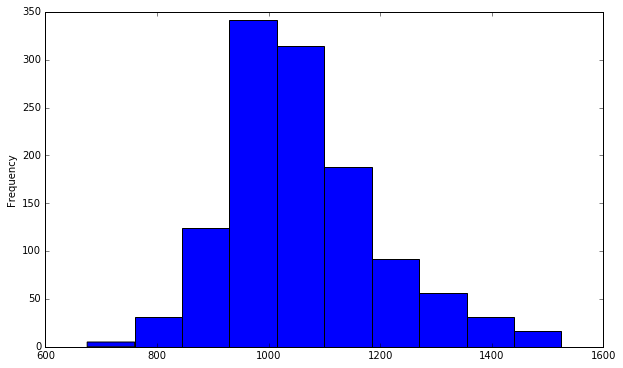

In [72]:
dfc.sat.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB79C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB88CF8>]], dtype=object)

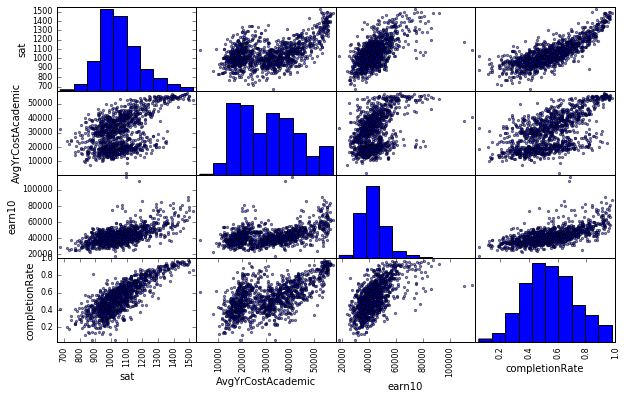

In [73]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dfc)

In [86]:
import sklearn.preprocessing as skpp

In [65]:
dfnorm = pandas.DataFrame(skpp.normalize(dfc, axis=1)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
dfnorm.describe()
# one example of where you'd need this: spectral clustering

,sat,cost,earn,gradrate
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.020306,0.559863,0.811218,0.000010
std,0.003536,0.138978,0.093612,0.000002
min,0.008879,0.058541,0.434900,0.000002
25%,0.017745,0.429005,0.743775,0.000009
50%,0.019860,0.603100,0.797427,0.000010
75%,0.022699,0.668159,0.902984,0.000012
max,0.035337,0.900296,0.997860,0.000018


In [66]:
dfnorm.head()

,sat,cost,earn,gradrate
0,0.023424,0.430111,0.902472,0.000009
1,0.025332,0.436271,0.899459,0.000010
2,0.023032,0.378675,0.925243,0.000009
3,0.025095,0.498338,0.866620,0.000008
4,0.023722,0.455148,0.890100,0.000014


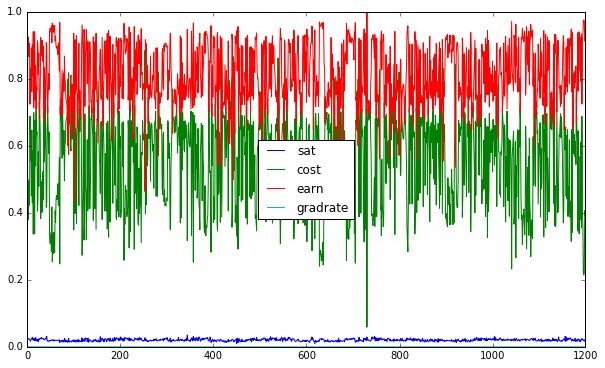

In [202]:
dfnorm.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A51630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D682E8>]], dtype=object)

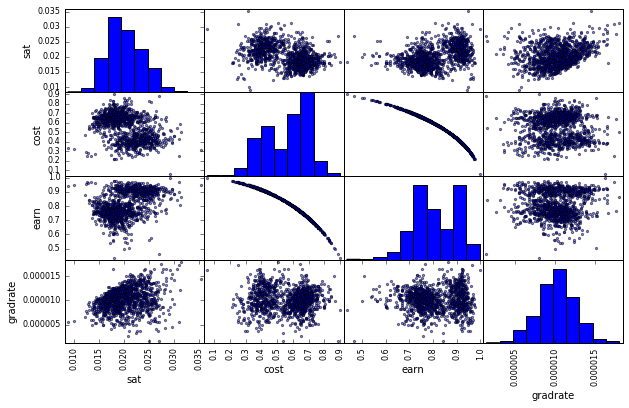

In [113]:
scatter_matrix(dfnorm)


In [72]:
pandas.DataFrame(skpp.scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})

,sat,cost,earn,gradrate
0,-1.779585,-1.308062,-1.156101,-1.314611
1,0.565574,-0.929657,-0.294116,-0.586403
2,0.748790,-0.968885,0.316053,-0.544098
3,-1.852871,-1.223743,-1.504769,-1.624847
4,0.528931,-0.753421,-0.090726,0.607724
5,0.455645,-0.798099,0.199830,0.635363
6,0.455645,0.746903,-0.139152,0.448657
7,-2.292588,-0.462969,-0.555617,-1.223233
8,-0.247903,-0.118506,-0.604043,-0.176327
9,-0.900150,-1.080705,-0.797748,-1.325329


### Scaling

In [74]:
from sklearn.preprocessing import scale

In [75]:
dfc.head()

,sat,AvgYrCostAcademic,earn10,completionRate
0,815.0,14965.0,31400.0,0.3171
1,1135.0,19547.0,40300.0,0.4462
3,1160.0,19072.0,46600.0,0.4537
4,805.0,15986.0,27800.0,0.2621
5,1130.0,21681.0,42400.0,0.6579


In [76]:
scale(dfc)

array([[-1.77958465, -1.30806212, -1.15610088, -1.31461139],
       [ 0.56557412, -0.92965722, -0.29411602, -0.5864029 ],
       [ 0.74878965, -0.96888514,  0.31605305, -0.544098  ],
       ..., 
       [-0.42378973, -1.53591439,  1.02307434,  0.08652717],
       [-0.59967664, -0.58858079,  0.94559256,  1.09451212],
       [ 0.08921375, -1.07186875, -0.15852289, -1.38511957]])

In [77]:
dfscale = pandas.DataFrame(scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
dfscale.describe()


,sat,cost,earn,gradrate
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00


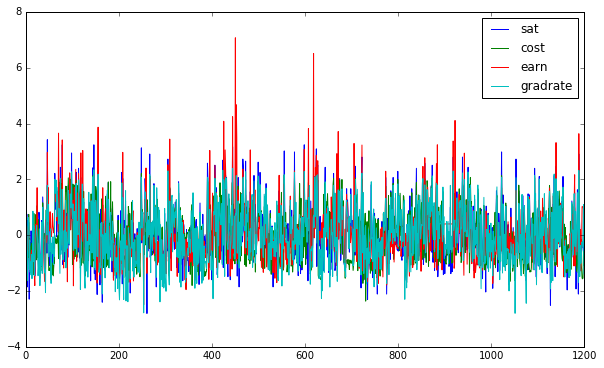

In [78]:
dfscale.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFC9240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011515470>]], dtype=object)

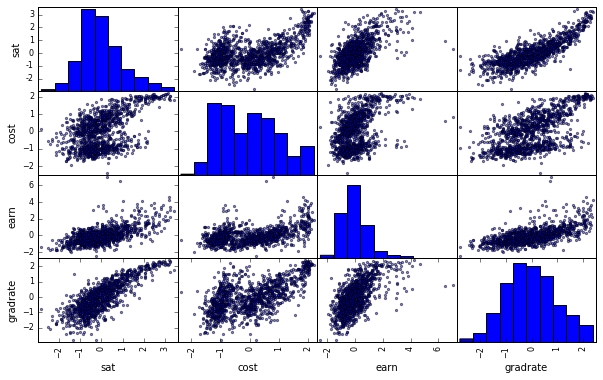

In [79]:
scatter_matrix(dfscale)

In [80]:
from sklearn.cluster import KMeans
?KMeans

In [74]:
type(dfscale)

pandas.core.frame.DataFrame

In [100]:

km = KMeans(n_clusters=7)
km.fit(dfscale)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [101]:
clusters = km.predict(dfscale)

In [102]:
clusters

array([0, 6, 6, ..., 6, 5, 6])

In [98]:
clusters = km.fit_predict(dfscale)

In [85]:
type(clusters)

numpy.ndarray

In [121]:
clusters[0:20]

array([1, 6, 6, 1, 6, 6, 2, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1])

In [103]:
dfscale['cluster'] = clusters

In [104]:
dfscale.head()

,sat,cost,earn,gradrate,cluster
0,-1.779585,-1.308062,-1.156101,-1.314611,0
1,0.565574,-0.929657,-0.294116,-0.586403,6
2,0.748790,-0.968885,0.316053,-0.544098,6
3,-1.852871,-1.223743,-1.504769,-1.624847,0
4,0.528931,-0.753421,-0.090726,0.607724,5


In [88]:
dfscale.describe()

,sat,cost,earn,gradrate,cluster
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17,2.803333
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,2.113857
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00,0.000000
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01,1.000000
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02,3.000000
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01,5.000000
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00,6.000000


In [101]:
dfscale

,sat,cost,earn,gradrate,cluster
0,-1.779585,-1.308062,-1.156101,-1.314611,4
1,0.565574,-0.929657,-0.294116,-0.586403,2
2,0.748790,-0.968885,0.316053,-0.544098,2
3,-1.852871,-1.223743,-1.504769,-1.624847,4
4,0.528931,-0.753421,-0.090726,0.607724,2
5,0.455645,-0.798099,0.199830,0.635363,2
6,0.455645,0.746903,-0.139152,0.448657,0
7,-2.292588,-0.462969,-0.555617,-1.223233,4
8,-0.247903,-0.118506,-0.604043,-0.176327,0
9,-0.900150,-1.080705,-0.797748,-1.325329,4


Dataframe visualization: see http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [102]:
dfscale.columns
dfscale.dtypes

sat         float64
cost        float64
earn        float64
gradrate    float64
cluster       int32
dtype: object

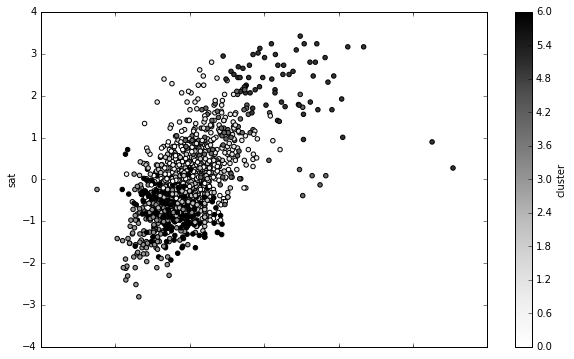

In [89]:
dfscale.plot.scatter(x='earn', y='sat', c='cluster');

We can also plot using matplotlib directly

http://matplotlib.org/1.5.0/api/index.html

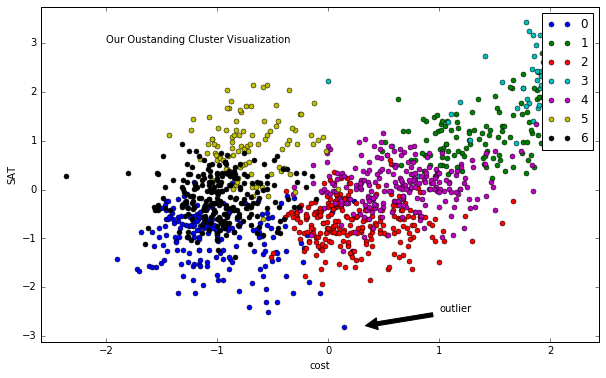

In [105]:
import matplotlib.pyplot as plt

groups = dfscale.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.cost, group.sat, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel("cost")
ax.set_ylabel("SAT")
ax.text(-2, 3, 'Our Oustanding Cluster Visualization')
ax.annotate('outlier', xy=(0.3, -2.8), xytext=(1, -2.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012571CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013C4E0B8>]], dtype=object)

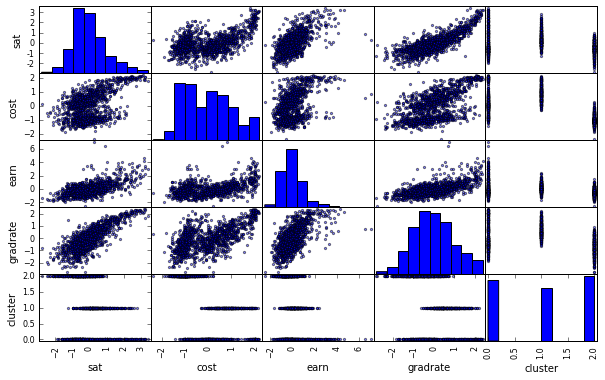

In [96]:
scatter_matrix(dfscale)

TODO: Build a pipeline: preprocess and cluster data

In [106]:
# we can extract data belonging to a particular cluster
condition = dfscale['cluster'] == 2
dfscale[condition].describe()

,sat,cost,earn,gradrate,cluster
count,244.000000,244.000000,244.000000,244.000000,244.0
mean,-0.679571,0.235658,-0.464719,-0.573321,2.0
std,0.447786,0.378808,0.501330,0.446821,0.0
min,-1.926157,-0.517971,-1.814696,-1.843705,2.0
25%,-0.936793,-0.047070,-0.773535,-0.843617,2.0
50%,-0.650977,0.169344,-0.497506,-0.540996,2.0
75%,-0.398140,0.492520,-0.146416,-0.234567,2.0
max,0.712147,1.661698,0.868111,0.468964,2.0


In [107]:
# let's find out more about the different cluster characteristics
clustergroup = dfscale.groupby('cluster')
clustergroup.describe()

cost        earn    gradrate         sat
cluster                                                      
0       count  194.000000  194.000000  194.000000  194.000000
        mean    -0.995971   -0.924704   -1.314696   -0.984051
        std      0.409170    0.437180    0.474254    0.553575
        min     -1.903088   -2.492662   -2.799796   -2.805592
        25%     -1.279756   -1.216634   -1.589734   -1.360021
        50%     -1.085660   -0.889757   -1.270896   -0.863507
        75%     -0.695921   -0.664576   -0.974903   -0.607005
        max      0.228268    0.751888   -0.262065    0.155171
1       count  123.000000  123.000000  123.000000  123.000000
        mean     1.392534    0.724565    1.236056    1.177544
        std      0.406811    0.608488    0.447056    0.580146
        min      0.486925   -0.875229    0.014891    0.235786
        25%      1.053335    0.311210    0.994390    0.712147
        50%      1.409483    0.732518    1.246246    1.151864
        75%      1.755267    1.148982    1.537021    1.536616
        max      2.133754    2.427432    2.232796    2.800804
2       count  244.000000  244.000000  244.000000  244.000000
        mean     0.235658   -0.464719   -0.573321   -0.679571
        std      0.378808    0.501330    0.446821    0.447786
        min     -0.517971   -1.814696   -1.843705   -1.926157
        25%     -0.047070   -0.773535   -0.843617   -0.936793
        50%      0.169344   -0.497506   -0.540996   -0.650977
        75%      0.492520   -0.146416   -0.234567   -0.398140
        max      1.661698    0.868111    0.468964    0.712147
3       count   63.000000   63.000000   63.000000   63.000000
        mean     1.817698    2.551495    1.836204    2.306994
        std      0.392185    1.195963    0.537662    0.653849
        min     -0.000327    0.897166   -0.078744    0.272429
        25%      1.798748    1.647771    1.733598    1.848083
        50%      1.918537    2.359635    2.036501    2.434373
        75%      2.024246    3.153823    2.153545    2.764160
        max      2.212127    7.076339    2.392427    3.423736
4       count  236.000000  236.000000  236.000000  236.000000
        mean     0.649583   -0.027649    0.399373    0.081109
        std      0.428171    0.511806    0.380510    0.439143
        min     -0.320179   -1.698473   -0.624759   -1.266581
        25%      0.354933   -0.381283    0.156753   -0.203931
        50%      0.653995   -0.051985    0.410301    0.063564
        75%      0.934123    0.308789    0.639734    0.345715
        max      1.870721    1.458909    1.511921    1.335079
5       count  100.000000  100.000000  100.000000  100.000000
        mean    -0.703828    0.897554    0.909572    0.883563
        std      0.298176    0.821844    0.577408    0.591827
        min     -1.436730   -0.352227   -0.828951   -0.599677
        25%     -0.909734    0.323317    0.591930    0.455645
        50%     -0.758871    0.737360    0.838708    0.932005
        75%     -0.520448    1.284575    1.387544    1.225150
        max      0.087543    3.657455    2.193312    2.141228
6       count  240.000000  240.000000  240.000000  240.000000
        mean    -0.970824   -0.167966   -0.241599   -0.170647
        std      0.311752    0.496678    0.450487    0.464480
        min     -2.362261   -1.543510   -1.449423   -1.376510
        25%     -1.152038   -0.499927   -0.541137   -0.497076
        50%     -0.985567   -0.177893   -0.281526   -0.203931
        75%     -0.802166    0.180460    0.100770    0.188150
        max     -0.107688    1.507336    0.925857    0.939334

In [109]:
type(clustergroup)

pandas.core.groupby.DataFrameGroupBy

In [110]:
clustergroup.median()

,sat,cost,earn,gradrate
cluster,,,,
0,-0.863507,-1.085660,-0.889757,-1.270896
1,1.151864,1.409483,0.732518,1.246246
2,-0.650977,0.169344,-0.497506,-0.540996
3,2.434373,1.918537,2.359635,2.036501
4,0.063564,0.653995,-0.051985,0.410301
5,0.932005,-0.758871,0.737360,0.838708
6,-0.203931,-0.985567,-0.177893,-0.281526


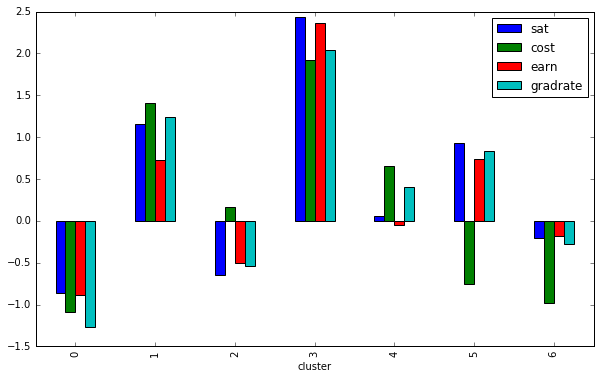

In [111]:
clustergroup.median().plot.bar()

Let's try another clustering algorithm

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [112]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN() # defaults
df = pandas.DataFrame(scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
clusters = dbs.fit_predict(df)
df['cluster'] = clusters
df.describe()

,sat,cost,earn,gradrate,cluster
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17,-0.119167
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,0.406329
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00,-1.000000
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01,0.000000
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02,0.000000
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01,0.000000
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00,2.000000


In [98]:
df.cluster.describe()

count    1200.000000
mean       -0.119167
std         0.406329
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: cluster, dtype: float64

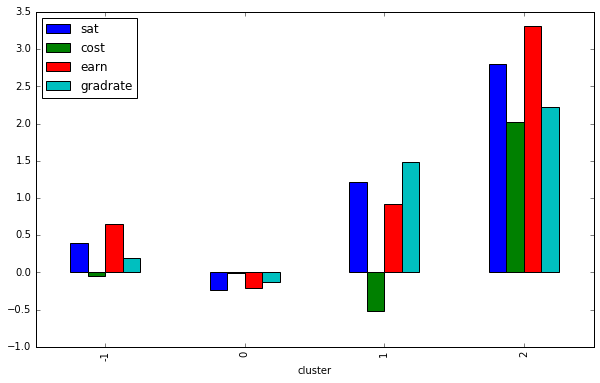

In [113]:
df.groupby(by='cluster').median().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B76C390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001DDA1E80>]], dtype=object)

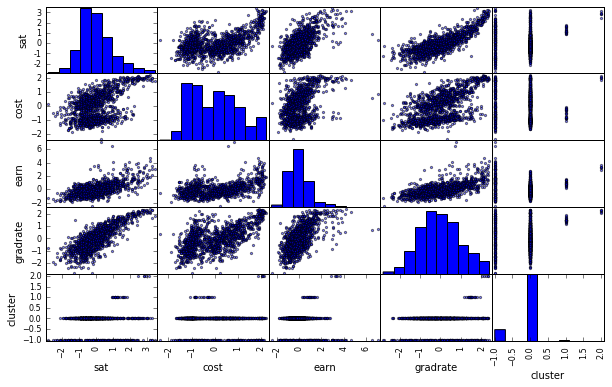

In [122]:
scatter_matrix(df)

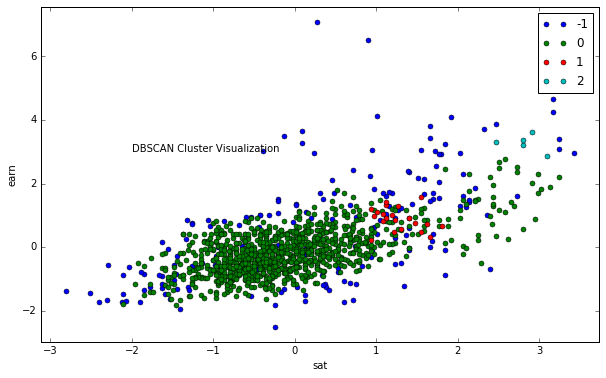

In [114]:
import matplotlib.pyplot as plt

groups = df.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.sat, group.earn, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel("sat")
ax.set_ylabel("earn")
ax.text(-2, 3, 'DBSCAN Cluster Visualization')


plt.show()

In [5]:
# temporal data
# I found that 2010 and 2011 are the only years with earnings data, reported
# for graduates six years prior (2006 and 2007)
# However 2009-2013 are the only years with cost data.


query = """
SELECT UNITID,
       INSTNM,
       CONTROL as type,
       COSTT4_A cost,
       Year
FROM Scorecard

where cost is not null

"""



dft = pandas.read_sql(query, conn)
dft.describe()
#dft

,UNITID,cost,Year
count,20504.000000,20504.000000,20504.000000
mean,234795.669040,23002.166699,2011.015558
std,110994.802588,11575.691881,1.410865
min,100654.000000,2200.000000,2009.000000
25%,157076.000000,13293.000000,2010.000000
50%,199625.000000,21395.500000,2011.000000
75%,240374.000000,29439.500000,2012.000000
max,483212.000000,74473.000000,2013.000000


In [20]:
# explore split-apply-combine with Pandas dataframes

grouped = dft.groupby(['type', 'Year'])
grouped.cost.mean()



type                Year
Private for-profit  2009    24722.214583
                    2010    25019.942885
                    2011    25842.545859
                    2012    25399.297345
                    2013    25654.190860
Private nonprofit   2009    29796.706355
                    2010    31130.604091
                    2011    32241.484454
                    2012    33442.437139
                    2013    34523.774839
Public              2009    12671.031953
                    2010    13253.603751
                    2011    13776.619163
                    2012    14322.836207
                    2013    14686.991369
Name: cost, dtype: float64

In [23]:
grouped.cost.describe()

type                Year       
Private for-profit  2009  count      960.000000
                          mean     24722.214583
                          std       7417.268359
                          min       5286.000000
                          25%      20105.750000
                          50%      24818.000000
                          75%      27631.750000
                          max      58535.000000
                    2010  count     1033.000000
                          mean     25019.942885
                          std       6109.575965
                          min       5102.000000
                          25%      21416.000000
                          50%      25119.000000
                          75%      28882.000000
                          max      54924.000000
                    2011  count     1123.000000
                          mean     25842.545859
                          std       6168.921507
                          min       5286.000000
        

In [19]:
grouped.size()

type                Year
Private for-profit  2009     960
                    2010    1033
                    2011    1123
                    2012    1130
                    2013    1116
Private nonprofit   2009    1369
                    2010    1369
                    2011    1383
                    2012    1384
                    2013    1399
Public              2009    1690
                    2010    1653
                    2011    1649
                    2012    1624
                    2013    1622
dtype: int64

In [29]:
x = grouped.cost.mean()
x

type                Year
Private for-profit  2009    24722.214583
                    2010    25019.942885
                    2011    25842.545859
                    2012    25399.297345
                    2013    25654.190860
Private nonprofit   2009    29796.706355
                    2010    31130.604091
                    2011    32241.484454
                    2012    33442.437139
                    2013    34523.774839
Public              2009    12671.031953
                    2010    13253.603751
                    2011    13776.619163
                    2012    14322.836207
                    2013    14686.991369
Name: cost, dtype: float64

In [28]:
x.get_values()

array([ 24722.21458333,  25019.9428848 ,  25842.54585931,  25399.29734513,
        25654.19086022,  29796.706355  ,  31130.60409058,  32241.48445409,
        33442.43713873,  34523.77483917,  12671.03195266,  13253.60375076,
        13776.61916313,  14322.8362069 ,  14686.99136868])

In [30]:
x.keys()

MultiIndex(levels=[[u'Private for-profit', u'Private nonprofit', u'Public'], [2009, 2010, 2011, 2012, 2013]],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'type', u'Year'])

In [53]:
pandas.DataFrame(x)

cost
type               Year              
Private for-profit 2009  24722.214583
                   2010  25019.942885
                   2011  25842.545859
                   2012  25399.297345
                   2013  25654.190860
Private nonprofit  2009  29796.706355
                   2010  31130.604091
                   2011  32241.484454
                   2012  33442.437139
                   2013  34523.774839
Public             2009  12671.031953
                   2010  13253.603751
                   2011  13776.619163
                   2012  14322.836207
                   2013  14686.991369

Principle Components Analsis (PCA)

In [131]:
dfscale.columns

Index([u'sat', u'cost', u'earn', u'gradrate', u'cluster'], dtype='object')

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=4)
pca.fit(dfscale[[u'sat', u'cost', u'earn', u'gradrate']])
print(pca.explained_variance_ratio_)

[ 0.70938183  0.1441152   0.10172053  0.04478244]


In [137]:
pca = PCA(n_components=2)
pcaArray = pca.fit_transform(dfscale[[u'sat', u'cost', u'earn', u'gradrate']])
dfpca = pandas.DataFrame(pcaArray)

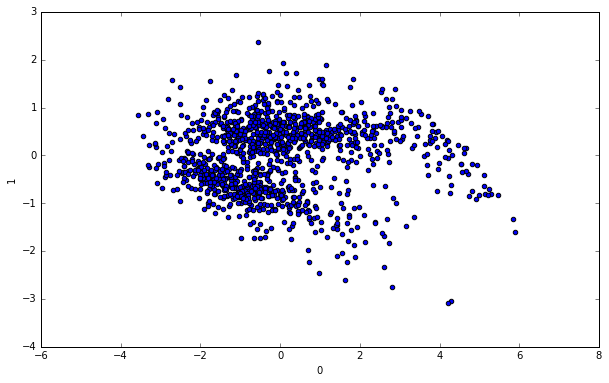

In [140]:
dfpca.plot.scatter(x=0, y=1)